# Exploring Environment

In [1]:
# Importing Essintial Libraries
from unityagents import UnityEnvironment
from collections import deque
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Instantiating Unity Environment
env = UnityEnvironment(file_name="env/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# Get Default Brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# Reset Environment
env_info = env.reset(train_mode=True)[brain_name]

# Examine Number of Agents 
print('Number of agents:', len(env_info.agents))

# Examine Action Space 
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# Examine State Space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


# Trainning a Double DQN Agent

In [5]:
# Importing the DQN Agent Class
from dqn_agent import Agent

# Instantiating a DQN Agent Object
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [ ]:
# Define the Training Function
def train(n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    max_score = -np.inf                # initialize max score
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment and collect information
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        while(True):
            action = agent.act(state, eps)                 # decide action
            env_info = env.step(action)[brain_name]        # apply action and collect information
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # is episode finished?
            agent.step(state, action, reward, next_state, done)   # train the agent model
            state = next_state                             # update current state
            score += reward                                # update total score
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        mean = np.mean(scores_window)
        if mean >= 13.0 and mean > max_score:
            max_score = mean
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

Episode 100	Average Score: 0.42
Episode 200	Average Score: 2.64
Episode 300	Average Score: 6.63
Episode 400	Average Score: 10.03
Episode 500	Average Score: 12.81
Episode 505	Average Score: 13.04
Environment solved in 405 episodes!	Average Score: 13.04
Episode 506	Average Score: 13.10
Environment solved in 406 episodes!	Average Score: 13.10
Episode 510	Average Score: 13.14
Environment solved in 410 episodes!	Average Score: 13.14
Episode 514	Average Score: 13.19
Environment solved in 414 episodes!	Average Score: 13.19
Episode 515	Average Score: 13.22
Environment solved in 415 episodes!	Average Score: 13.22
Episode 516	Average Score: 13.27
Environment solved in 416 episodes!	Average Score: 13.27
Episode 517	Average Score: 13.37
Environment solved in 417 episodes!	Average Score: 13.37
Episode 518	Average Score: 13.41
Environment solved in 418 episodes!	Average Score: 13.41
Episode 524	Average Score: 13.47
Environment solved in 424 episodes!	Average Score: 13.47
Episode 526	Average Score: 1

Episode 1600	Average Score: 15.57
Episode 1700	Average Score: 14.79
Episode 1800	Average Score: 15.01
Episode 1900	Average Score: 14.89
Episode 2000	Average Score: 14.27


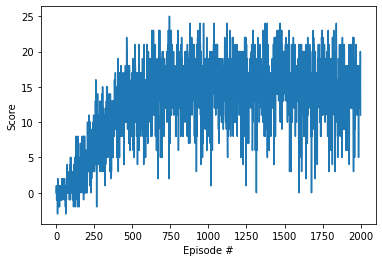

In [6]:
scores = train()       # Start trainning

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
# Restore best model
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

<All keys matched successfully>

In [9]:
# Simulate the best model on Unity Environment
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name] 
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 16.0


In [10]:
# Close environment
env.close()